<a href="https://colab.research.google.com/github/mimiachiu/Deep-Learning-with-Python-Book/blob/master/Ch06_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#以Numpy實現簡單的RNN
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    print(output_t.shape)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.array(successive_outputs)
print(final_output_sequence.shape)

(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(100, 64)


In [ ]:
pip install keras

In [ ]:
#使用SimpleRNN
#準備IMDB資料
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500

batch_size = 32

print('讀取資料...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

讀取資料...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
#以嵌入向量Embedding層和SimpleRNN層訓練模型
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32)) #其中return_sequences參數決定是否回傳每個時間點的連續輸出的完整序列資料
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.5876 - acc: 0.6781 - val_loss: 0.7958 - val_acc: 0.5938
Epoch 2/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.3766 - acc: 0.8434 - val_loss: 0.4136 - val_acc: 0.8340
Epoch 3/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.2807 - acc: 0.8926 - val_loss: 0.3140 - val_acc: 0.8720
Epoch 4/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2176 - acc: 0.9210 - val_loss: 0.3711 - val_acc: 0.8470
Epoch 5/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.1725 - acc: 0.9373 - val_loss: 0.4601 - val_acc: 0.7932
Epoch 6/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.1216 - acc: 0.9582 - val_loss: 0.5132 - val_acc: 0.7998
Epoch 7/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.0874 - acc: 0.9710 - val_loss: 0.4566 - val_acc:

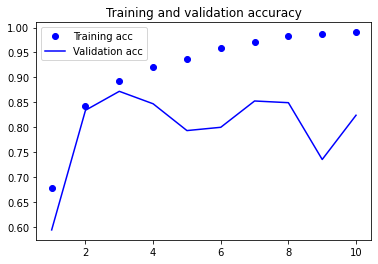

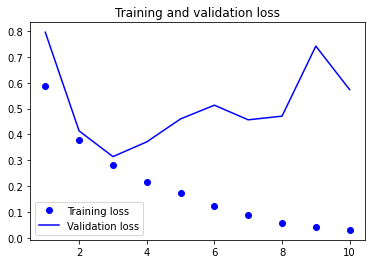

In [ ]:
#繪製結果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#使用LSTM
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 205s 10ms/step - loss: 0.5186 - acc: 0.7538 - val_loss: 0.3706 - val_acc: 0.8542
Epoch 2/10
20000/20000 [==============================] - 204s 10ms/step - loss: 0.3121 - acc: 0.8771 - val_loss: 0.2989 - val_acc: 0.8844
Epoch 3/10
20000/20000 [==============================] - 203s 10ms/step - loss: 0.2371 - acc: 0.9114 - val_loss: 0.3025 - val_acc: 0.8892
Epoch 4/10
20000/20000 [==============================] - 204s 10ms/step - loss: 0.1994 - acc: 0.9276 - val_loss: 0.3324 - val_acc: 0.8886
Epoch 5/10
20000/20000 [==============================] - 201s 10ms/step - loss: 0.1797 - acc: 0.9346 - val_loss: 0.3209 - val_acc: 0.8610
Epoch 6/10
20000/20000 [==============================] - 201s 10ms/step - loss: 0.1593 - acc: 0.9439 - val_loss: 0.3407 - val_acc: 0.8700
Epoch 7/10
20000/20000 [==============================] - 202s 10ms/step - loss: 0.1435 - acc: 0.9494 - val_loss: 0.3

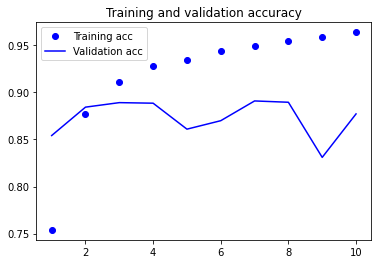

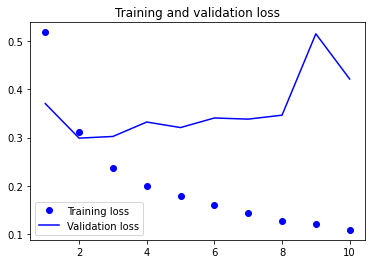

In [ ]:
#繪製結果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()